In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.1MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=0a97ac57cd9b9f07b393c2761468d8341104983a934b673c535d87c15fed1a78
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 2.6MB/s 
     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=b73b74887383bc8c05abb156b004b7904e2c822c660f87937cade4cdd502a99d
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
[Errno 2] No such file or directory: '/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/'
/content


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [ ]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [ ]:
#Importing Various twitter data

df_com = pd.read_json('pretty_ml_tweets_complaint.json')

df_feed = pd.read_json('pretty_jp_tweets_complaint.json')

df_req = pd.read_json('pretty_ms_tweets_complaint.json')

df_req1 = pd.read_json('pretty_gs_tweets_complaint.json')


In [ ]:
df = pd.concat([df_com,df_feed,df_req, df_req1])

In [ ]:
#Sentiment Analysis
#Vader Sentiment

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [ ]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [ ]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

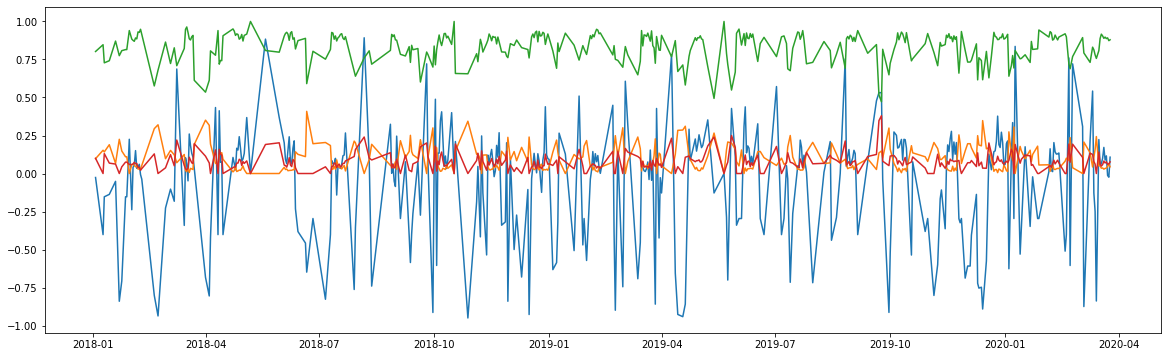

In [ ]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [ ]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'The Walt Disney Company (DIS) surprised the market with Q1 result. Merrill Lynch changed the rating to Outperform, as The Walt Disney Company (DIS) reported a net revenue that soared 7%.'

In [ ]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'JP Morgan y Bank of America Merrill Lynch coinciden en que el entorno actual invita a comprar acciones de riesgo para obtener rentabilidades a futuro. http://bit.ly/2ZPSri9\xa0'

Text(0, 0.5, 'Sentiment')

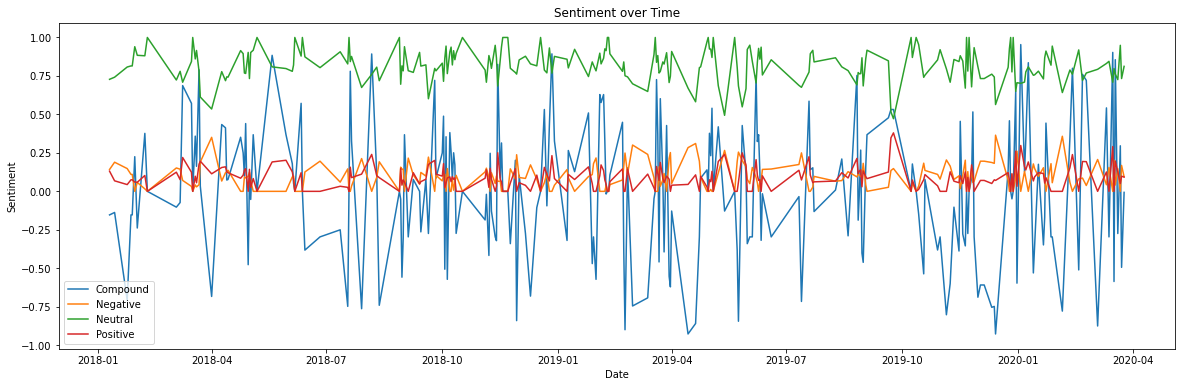

In [ ]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

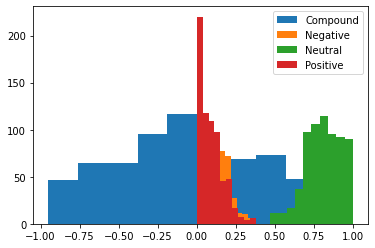

In [ ]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

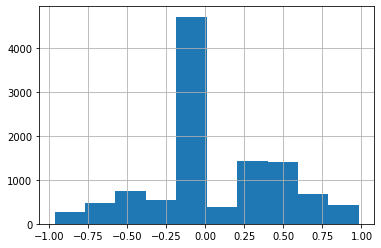

In [ ]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [ ]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.940,0.060,0.2263
1,0.798,0.090,-0.1027
2,0.622,0.278,0.5719
3,0.808,0.086,-0.1027
4,0.932,0.068,0.2263
...,...,...,...
312,0.681,0.111,-0.3182
313,0.857,0.066,-0.1027
314,0.886,0.000,-0.4019
315,0.851,0.080,0.1027


In [ ]:
#Importing Various twitter data
df_com = pd.read_json('pretty_ml_tweets_complaint.json')

df_feed = pd.read_json('pretty_jp_tweets_complaint.json')

df_req = pd.read_json('pretty_ms_tweets_complaint.json')

df_req1 = pd.read_json('pretty_gs_tweets_complaint.json')


In [ ]:
df = pd.concat([df_com,df_feed,df_req, df_req1])

In [ ]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 23.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=95dba21a933d18d0fdc091b55a6b10a0656b937d35dd27524c2cd1997d3bc1ab
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=d89bf998fcbf0bcfb8a27e1630551185eb1b9c5f410c6494f35f5ef5b39834d6
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(11052, 2268)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [ ]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [ ]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [ ]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,The Walt Disney Company (DIS) surprised the ma...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:52:38,2019-09-03 23:52:38,1169035503360008192,/GoldmanSachBOT/status/1169035503360008193,1119063948689596416,EquityMarketPredictor,,0.000,0.940,0.060,0.2263
1,True,[],[https://pbs.twimg.com/media/EDk7DjIXoAE8VPL.jpg],False,False,0,[https://fastinews.com/2019/09/03/its-a-great-...,,0,[],0,FastiNews,"It’s a ‘great time’ to buy risk assets, Bank o...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:32:48,2019-09-03 23:32:48,1169030512159186944,/FastiNews/status/1169030512159186950,1039728124366336000,Fasti News,,0.112,0.798,0.090,-0.1027
2,False,[],[],False,False,1,[https://www.cnbc.com/2019/09/03/its-a-great-t...,,0,[],1,MohamedHawary,It's a 'great time' to buy risk assets: Bank o...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:16:50,2019-09-03 23:16:50,1169026495005831168,/MohamedHawary/status/1169026495005831171,25261709,Mohamed Hawary,,0.100,0.622,0.278,0.5719
3,True,[CNBCStockMarketNews],[https://pbs.twimg.com/media/EDk0mZaX4AAeEna.jpg],False,False,0,[http://dlvr.it/RCQR4h],,0,[],0,feed_stocks,#CNBCStockMarketNews It’s a ‘great time’ to bu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:04:36,2019-09-03 23:04:36,1169023416151814144,/feed_stocks/status/1169023416151814144,1006334607946649600,Stocks News Feed - Stock News & Stocks Chat,,0.106,0.808,0.086,-0.1027
4,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Paper Co. (IP) surprised the market with Q2 re...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:02:39,2019-09-03 23:02:39,1169022925271371776,/GoldmanSachBOT/status/1169022925271371779,1119063948689596416,EquityMarketPredictor,,0.000,0.932,0.068,0.2263


In [ ]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.418379 -0.085704       1        1  17.497313
5     -0.093885  0.074437       2        1  11.448448
6     -0.113443 -0.067234       3        1  11.344202
0     -0.100099 -0.112603       4        1  10.515035
7     -0.111965  0.009756       5        1  10.089037
8     -0.098930  0.080546       6        1   8.809294
1     -0.073485  0.092470       7        1   8.381638
3     -0.126177 -0.165705       8        1   8.202095
2      0.236800  0.045771       9        1   7.472343
9      0.062803  0.128266      10        1   6.240594, topic_info=          Term        Freq       Total Category  logprob  loglift
748     result  124.000000  124.000000  Default  30.0000  30.0000
881  surprised  125.000000  125.000000  Default  29.0000  29.0000
155    changed  125.000000  125.000000  Default  28.0000  28.0000
719     rating  126.000000  126.000000  Default  27.0000  27.0000
231        cvs   51.000000   51.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
787       says    5.104853   19.607199  Topic10  -5.0558   1.4284
174    clients    5.190592   24.789081  Topic10  -5.0391   1.2105
380      great    5.288559   32.213507  Topic10  -5.0204   0.9673
758    revenue    5.337062   74.652703  Topic10  -5.0113   0.1359
742   reported    5.110012   70.938303  Topic10  -5.0547   0.1435

[571 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         1  0.957128       aapl
0        10  0.033004       aapl
1         1  0.977299       aaxn
3         7  0.912011    academy
5         2  0.246736  according
...     ...       ...        ...
1001      5  0.240725      years
1001      6  0.280846      years
1001      7  0.120362      years
1001      8  0.040121      years
1001     10  0.040121      years

[1119 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 7, 1, 8, 9, 2, 4, 3, 10])

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.050197  0.070631       1        1  13.029210
7     -0.073206  0.038344       2        1  12.059451
4     -0.060264  0.043456       3        1  11.870210
1     -0.066666  0.048881       4        1  10.736467
8     -0.081998  0.082352       5        1  10.495471
0      0.405500  0.092023       6        1   9.792070
9     -0.058456 -0.127309       7        1   8.437035
6     -0.008625  0.002109       8        1   8.428421
3      0.078667 -0.287515       9        1   7.732184
2     -0.084755  0.037027      10        1   7.419481, topic_info=          Term       Freq       Total Category  logprob  loglift
537     rating  52.000000   52.000000  Default  30.0000  30.0000
168       cuts  35.000000   35.000000  Default  29.0000  29.0000
144  complaint  55.000000   55.000000  Default  28.0000  28.0000
637  surprised  30.000000   30.000000  Default  27.0000  27.0000
557     result  30.000000   30.000000  Default  26.0000  26.0000
..         ...        ...         ...      ...      ...      ...
35     america   6.916794   67.463201  Topic10  -4.3021   0.3234
381   jpmorgan   6.172844   46.542007  Topic10  -4.4159   0.5809
144  complaint   5.993751   55.752203  Topic10  -4.4453   0.3709
338      https   6.104178   89.461730  Topic10  -4.4270  -0.0838
137        com   5.686769  109.767478  Topic10  -4.4979  -0.3592

[508 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         7  0.942028       aapl
1         6  0.875435       aaxn
2         9  0.919197  abgestuft
4         1  0.644041  according
4         2  0.128808  according
...     ...       ...        ...
726      10  0.065606      years
727       3  0.496620       york
727       5  0.099324       york
727       9  0.347634       york
728       9  0.855164       ziel

[900 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 5, 2, 9, 1, 10, 7, 4, 3])

In [ ]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.375773  0.102266       1        1  13.262229
7     -0.053730 -0.020369       2        1  11.665530
6     -0.050068 -0.059094       3        1  11.173443
8     -0.090442  0.129528       4        1  10.776558
9     -0.066179  0.168577       5        1  10.255349
5     -0.028683  0.106674       6        1   9.334888
0     -0.082647 -0.052120       7        1   9.311462
2      0.105493 -0.238976       8        1   9.221629
3     -0.081567 -0.010009       9        1   8.536931
1     -0.027950 -0.126477      10        1   6.461980, topic_info=           Term        Freq       Total Category  logprob  loglift
425     karauri  176.000000  176.000000  Default  30.0000  30.0000
427       kikan  168.000000  168.000000  Default  29.0000  29.0000
194        date  168.000000  168.000000  Default  28.0000  28.0000
504         net  179.000000  179.000000  Default  27.0000  27.0000
164  conference   81.000000   81.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
84         bofa   15.423174  119.562380  Topic10  -3.8326   0.6913
361       https   12.673197  271.018793  Topic10  -4.0289  -0.3235
28      america    9.629283  234.838000  Topic10  -4.3036  -0.4549
58         bank    9.319269  243.190376  Topic10  -4.3364  -0.5225
155         com    8.972595  243.128510  Topic10  -4.3743  -0.5602

[523 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         8  0.837591       aaxn
4         2  0.696287  according
4         8  0.174072  according
4         9  0.087036  according
6         4  0.709029   accounts
...     ...       ...        ...
781       3  0.864344      yahoo
786       3  0.891325       yhoo
787       2  0.094304      yield
787       7  0.848732      yield
789      10  0.920685       ziel

[786 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 7, 9, 10, 6, 1, 3, 4, 2])

In [ ]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(4269, 25)
(2369, 25)
(4414, 25)
